In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set consistent visualisation template.
sns.set(rc = {'figure.figsize':(8, 6)})

In [3]:
# Import cleaned dataset.
df = pd.read_csv('creative_cleaned.csv')
df

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Campaign_Name,Target_Group
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,CloseFaster,1.0
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,CloseFaster,1.0
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,CloseFaster,1.0
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,CloseFaster,1.0
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,CloserTwins,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101659,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,CloserTwins,3.0
101660,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,CloserTwins,3.0
101661,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,CloserTwins,3.0
101662,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,CloserTwins,3.0


Create 3 subsets corresponding to each Target Group in order to answer each aspect of Problem Statement.

In [4]:
df1 = df[df['Target_Group'] == 1]
df2 = df[df['Target_Group'] == 2]
df3 = df[df['Target_Group'] == 3]

To evaluate engagement and cost-effectiveness of Campaigns, group Target Group 1 DataFrame by Campaign, and summate Clicks, Impressions and Spend. Use these variables to calculate the cost-per-click and click-through-rate of each campaign (ignore records where Campaign is 'Other')

In [5]:
df1_campaign = df1.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df1_campaign['CPC'] = df1_campaign['Spend'] / df1_campaign['Clicks']
df1_campaign['CTR'] = (df1_campaign['Clicks'] / df1_campaign['Impressions'])*100
df1_campaign.drop(df1_campaign[df1_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df1_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPC,CTR
0,CloseFaster,3282,1805930,14083.132090,4.291021,0.181735
1,CloserTwins,3995,2708066,41115.631535,10.291773,0.147522
3,UnfairAdvantage,6217,4093042,39366.966858,6.332148,0.151892


Campaign is a categorical variable, so utilise barplots to compare the CPC and CTR of each Campaign. To ensure visualisations are comprehensible, set labels for x-axis, y-axis and title.

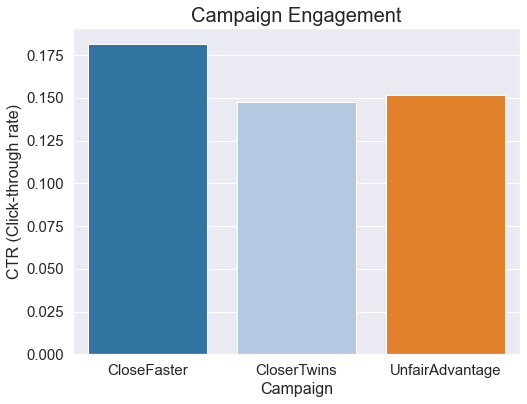

In [6]:
sns.barplot(data=df1_campaign, x='Campaign_Name', y='CTR', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CTR (Click-through rate)', fontsize=16)
plt.title('Campaign Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

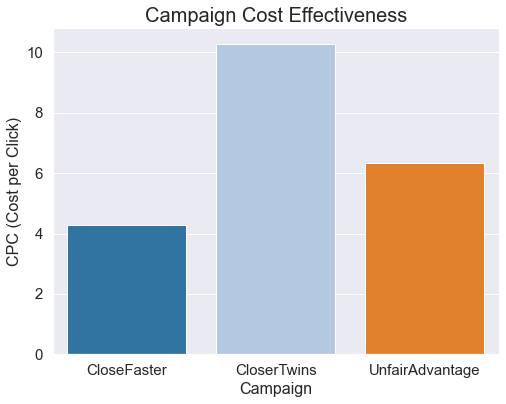

In [7]:
sns.barplot(data=df1_campaign, x='Campaign_Name', y='CPC', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

Initial analysis indicated that CloseFaster was the best campaign in terms of engagement and cost effectiveness.

To evaluate engagement and cost-effectiveness of Platforms, group Target Group 1 DataFrame by Platform, and summate Clicks, Impressions and Spend. Use these variables to calculate the cost-per-click and click-through-rate of each platform.

In [8]:
df1_platform = df1.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df1_platform['CPC'] = df1_platform['Spend'] / df1_platform['Clicks']
df1_platform['CTR'] = (df1_platform['Clicks'] / df1_platform['Impressions'])*100
df1_platform

,Platform,Clicks,Impressions,Spend,CPC,CTR
0,Domain Display,1303,2739642,23881.933135,18.328421,0.047561
1,Facebook,1818,262991,5023.482582,2.763192,0.691278
2,Instagram,177,56001,1023.677626,5.783489,0.316066
3,LinkedIn,935,516285,39454.821303,42.197670,0.181102
4,User ID Display,9286,5033150,25847.311728,2.783471,0.184497


Platform is a categorical variable, so utilise barplots to compare the CPC and CTR of each Platform. To ensure visualisations are comprehensible, set labels for x-axis, y-axis and title.

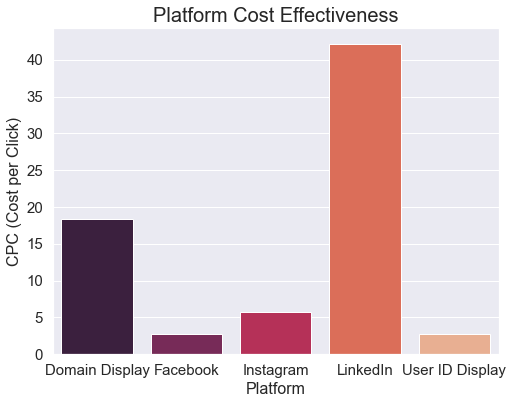

In [9]:
sns.barplot(data=df1_platform, x='Platform', y='CPC', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

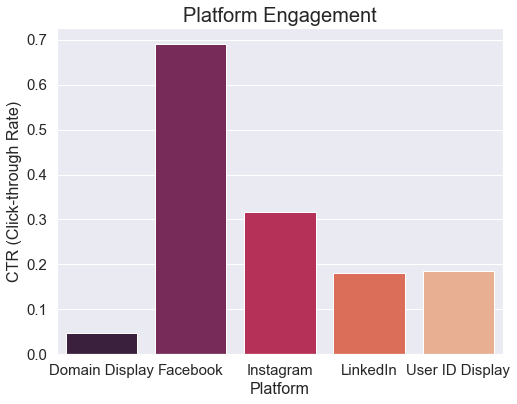

In [10]:
sns.barplot(data=df1_platform, x='Platform', y='CTR', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR (Click-through Rate)', fontsize=16)
plt.title('Platform Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

Initial analysis indicates that Facebook is the best platform in terms of engagement and cost-effectiveness.

To evaluate engagement and cost-effectiveness of Campaigns, group Target Group 2 DataFrame by Campaign, and summate Clicks, Impressions and Spend. Use these variables to calculate the cost-per-click and click-through-rate of each campaign (ignore records where Campaign is 'Other')

In [11]:
df2_campaign = df2.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df2_campaign['CPC'] = df2_campaign['Spend'] / df2_campaign['Clicks']
df2_campaign['CTR'] = (df2_campaign['Clicks'] / df2_campaign['Impressions'])*100
df2_campaign.drop(df2_campaign[df2_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df2_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPC,CTR
0,CloseFaster,7499,4269441,43361.166342,5.782260,0.175644
1,CloserTwins,10072,9812880,101870.513593,10.114229,0.102641
3,UnfairAdvantage,20721,14590307,177776.173833,8.579517,0.142019


Campaign is a categorical variable, so utilise barplots to compare the CPC and CTR of each Campaign. To ensure visualisations are comprehensible, set labels for x-axis, y-axis and title.

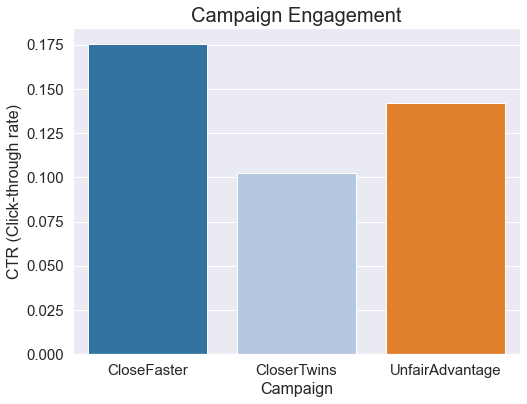

In [12]:
sns.barplot(data=df2_campaign, x='Campaign_Name', y='CTR', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CTR (Click-through rate)', fontsize=16)
plt.title('Campaign Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

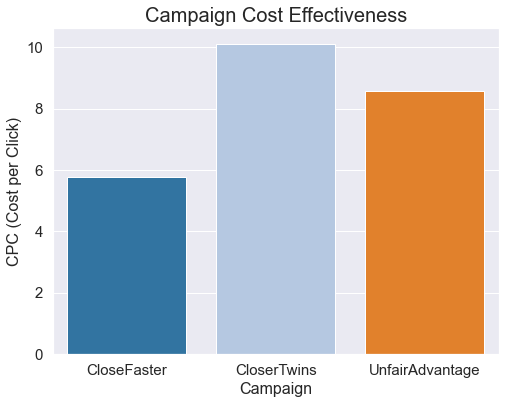

In [13]:
sns.barplot(data=df2_campaign, x='Campaign_Name', y='CPC', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

Initial analysis suggested CloseFaster was the best campaign in terms of cost effectiveness and engagement.

To evaluate engagement and cost-effectiveness of Platforms, group Target Group 2 DataFrame by Platform, and summate Clicks, Impressions and Spend. Use these variables to calculate the cost-per-click and click-through-rate of each platform.

In [14]:
df2_platform = df2.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df2_platform['CPC'] = df2_platform['Spend'] / df2_platform['Clicks']
df2_platform['CTR'] = (df2_platform['Clicks'] / df2_platform['Impressions'])*100
df2_platform

,Platform,Clicks,Impressions,Spend,CPC,CTR
0,Domain Display,18115,19564371,133867.053908,7.389846,0.092592
1,LinkedIn,10456,3165406,160038.731038,15.305923,0.330321
2,User ID Display,10294,5998098,29331.148822,2.849344,0.171621


Platform is a categorical variable, so utilise barplots to compare the CPC and CTR of each Platform. To ensure visualisations are comprehensible, set labels for x-axis, y-axis and title.

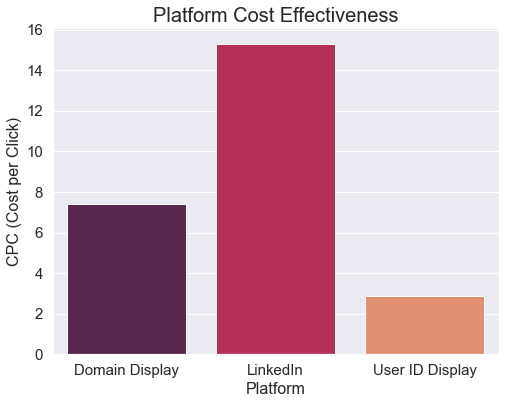

In [15]:
sns.barplot(data=df2_platform, x='Platform', y='CPC', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

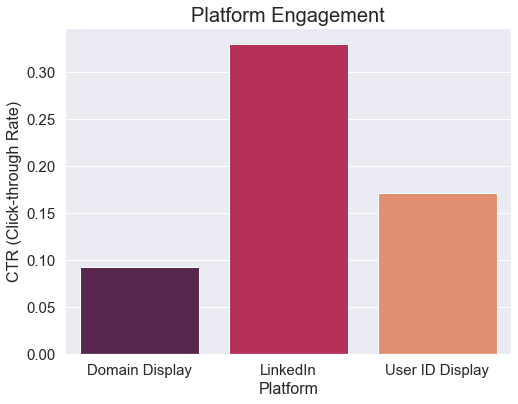

In [16]:
sns.barplot(data=df2_platform, x='Platform', y='CTR', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CTR (Click-through Rate)', fontsize=16)
plt.title('Platform Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

Initial analysis indicated LinkedIn was the best platform in terms of engagement, but very expensive. By contrast, User ID Display was the least expensive platform and featured a respectable CTR.

For Target Group 3, create a new variable: Impressions (000s). This is because with Target Group 3, we want to analyse which Campaigns and Platforms perform best in terms of reaching new audiences, so thousand impressions is a good metric for this.

In [17]:
df3['Impressions_000s'] = df3['Impressions'] / 1000
df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Campaign_Name,Target_Group,Impressions_000s
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.005076,0.0,0.0,0.00,Other,3.0,0.197
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.000527,0.0,0.0,0.00,Other,3.0,1.897
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.007299,0.0,0.0,0.00,Other,3.0,0.137
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,Other,1099,0,0,0,0.000000,0.0,0.0,0.00,Other,3.0,0.019
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,Other,NoDTI,0,0,0,0.000000,0.0,0.0,0.00,Other,3.0,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101659,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,CloserTwins,3.0,0.003
101660,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,CloserTwins,3.0,0.005
101661,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,CloserTwins,3.0,0.004
101662,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,CloserTwins,3.0,0.017


There are several records where the Platform is Trade Media, but Campaign is blank. As Trade Media was only used with CloserTwins for Target Group 3, fill in Campaign as CloserTwins for all records where Platform is Trade Media.

In [18]:
df3.loc[df3['Platform']== 'Trade Media', 'Campaign_Name'] = 'CloserTwins'
df3[df3['Platform']=='Trade Media']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Campaign_Name,Target_Group,Impressions_000s
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.005076,0.0,0.0,0.0,CloserTwins,3.0,0.197
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.000527,0.0,0.0,0.0,CloserTwins,3.0,1.897
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,Other,No Answer,0,0,0,0.007299,0.0,0.0,0.0,CloserTwins,3.0,0.137
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,Other,1099,0,0,0,0.000000,0.0,0.0,0.0,CloserTwins,3.0,0.019
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,Other,NoDTI,0,0,0,0.000000,0.0,0.0,0.0,CloserTwins,3.0,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74961,Housing Wire,Display,0,2022-10-26,534,0,General Targetting,Trade Media,CloserTwins,Digital,0,0,0,0.000000,0.0,0.0,0.0,CloserTwins,3.0,0.534
74962,Housing Wire,Display,0,2022-10-27,427,0,General Targetting,Trade Media,CloserTwins,Digital,0,0,0,0.000000,0.0,0.0,0.0,CloserTwins,3.0,0.427
74963,Housing Wire,Display,0,2022-10-28,265,0,General Targetting,Trade Media,CloserTwins,Digital,0,0,0,0.000000,0.0,0.0,0.0,CloserTwins,3.0,0.265
74964,Housing Wire,Display,0,2022-10-29,26,0,General Targetting,Trade Media,CloserTwins,Digital,0,0,0,0.000000,0.0,0.0,0.0,CloserTwins,3.0,0.026


To evaluate engagement and cost-effectiveness of Campaigns, group Target Group 3 DataFrame by Campaign, and summate Clicks, Impressions and Spend. Use these variables to calculate the cost-per-mille and impressions of each campaign (ignore records where Campaign is 'Other')

In [19]:
df3_campaign = df3.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df3_campaign['CPM'] = df3_campaign['Spend'] / (df3_campaign['Impressions'] / 1000)
df3_campaign.drop(df3_campaign[df3_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df3_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPM
0,CloserTwins,445,7914295,260633.910008,32.932044
1,CompetitiveOpportunity,373,276361,3261.037592,11.799920
3,SEM Ads,12429,66693,8674.350000,130.063875


Campaign is a categorical variable, so utilise barplots to compare the CPM and Impressions of each Campaign. To ensure visualisations are comprehensible, set labels for x-axis, y-axis and title.

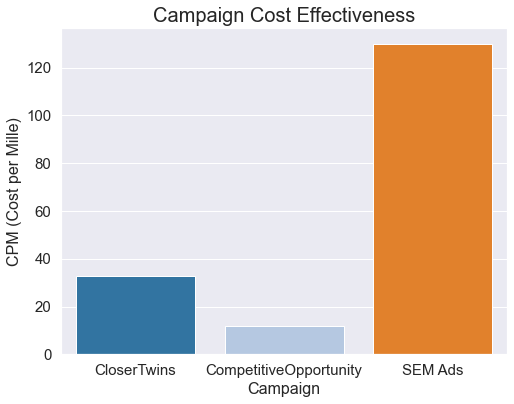

In [20]:
sns.barplot(data=df3_campaign, x='Campaign_Name', y='CPM', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPM (Cost per Mille)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

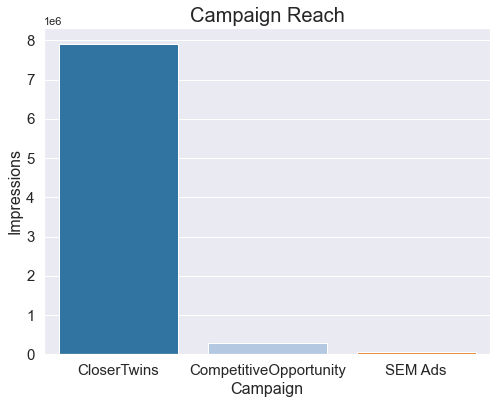

In [21]:
sns.barplot(data=df3_campaign, x='Campaign_Name', y='Impressions', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('Campaign Reach', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

To evaluate engagement and cost-effectiveness of Platforms, group Target Group 3 DataFrame by Platform, and summate Clicks, Impressions and Spend. Use these variables to calculate the cost-per-mille and impressions of each campaign (ignore records where Campaign is 'Other')

In [22]:
df3_platform = df3.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df3_platform['CPM'] = df3_platform['Spend'] / (df3_platform['Impressions'] / 1000)
df3_platform

,Platform,Clicks,Impressions,Spend,CPM
0,Domain Display,263,262110,1275.127592,4.864857
1,Google SEM,12429,66693,8674.350000,130.063875
2,LinkedIn,1024,1347888,12390.641315,9.192634
3,OTT,0,7348177,249833.910000,33.999441
4,Trade Media,445,566118,10800.000008,19.077295


Platform is a categorical variable, so utilise barplots to compare the CPM and Impressions of each Platform. To ensure visualisations are comprehensible, set labels for x-axis, y-axis and title.

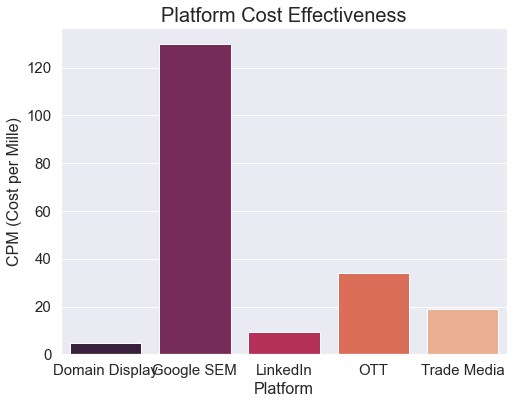

In [23]:
sns.barplot(data=df3_platform, x='Platform', y='CPM', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPM (Cost per Mille)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

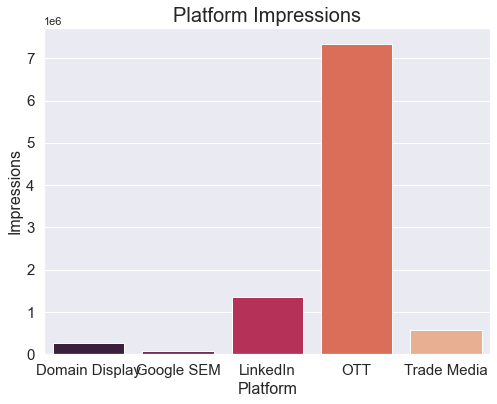

In [24]:
sns.barplot(data=df3_platform, x='Platform', y='Impressions', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('Platform Impressions', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

Initial analysis indicated that OTT generated the most impressions, and had a reasonable CPM.

The feedback we received from this initial analysis was to focus more on Weighted CTR Score over CTR, and to look into predictive modelling. This is something that is taken into account in the Final Analysis.

In [25]:
# Export DataFrame subsets into CSV files.
df1.to_csv('Creative1.csv', index = False)
df2.to_csv('Creative2.csv', index = False)
df3.to_csv('Creative3.csv', index = False)